In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#load cleaned data
df = pd.read_csv('loan_data_cleaned.csv')

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Log_Total_Income,Log_LoanAmount,EMI,Balance_Income
0,1,0,0,0,0,360.0,1.0,1,0.0,0.0,1.0,8.674197,4.859812,0.355556,5848.644444
1,1,1,1,0,0,360.0,1.0,0,1.0,0.0,0.0,8.714732,4.859812,0.355556,6090.644444
2,1,1,0,0,1,360.0,1.0,1,0.0,0.0,1.0,8.006701,4.204693,0.183333,2999.816667
3,1,1,0,1,0,360.0,1.0,1,0.0,0.0,1.0,8.505525,4.795791,0.333333,4940.666667
4,1,0,0,0,0,360.0,1.0,1,0.0,0.0,1.0,8.699681,4.955827,0.391667,5999.608333


In [4]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(f"Training data size: {len(X_train)} samples")
print(f"Testing data size: {len(X_test)} samples\n")

Training data size: 491 samples
Testing data size: 123 samples



In [6]:
#Feature scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# Logistic Regression

In [25]:
model=LogisticRegression(max_iter=100)
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
#Make predictions on the test set
y_pred=model.predict(X_test_scaled)
y_prob=model.predict_proba(X_test_scaled)

In [31]:
#Evaluate model performance
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy= {accuracy:.4f}\n")

accuracy= 0.7805



In [32]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("---CONFUSION MATRIX---")
print(conf_matrix)
print("\n")


---CONFUSION MATRIX---
[[18 25]
 [ 2 78]]




In [33]:
#Precision: for all predicted positive , how many were actually positive
#recall: of all actualpositives, how many did the model correctly identify
#F1-score: Harmonic mean of precision and recall
print("-----CLASSIFICATION REPORT-----")
print(classification_report(y_test, y_pred))

-----CLASSIFICATION REPORT-----
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



# K Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
accuracies = []
k_values = list(range(3, 31, 2))  # Only 14 values: 3, 5, ..., 29

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

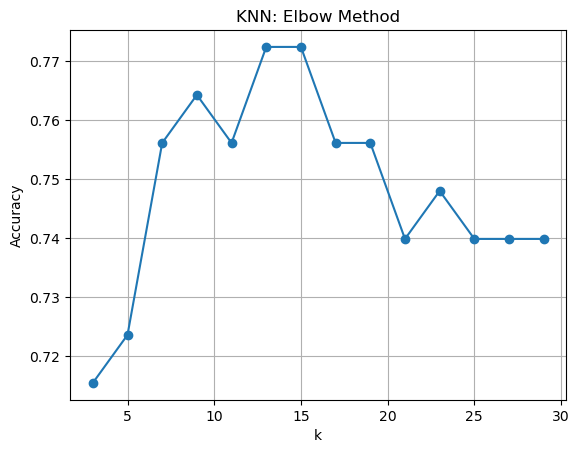

Best k: 13, Accuracy: 0.7724


In [53]:
#Elbow method for finding the best k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN: Elbow Method')
plt.grid(True)
plt.show()

print(f"Best k: {k_values[accuracies.index(max(accuracies))]}, Accuracy: {max(accuracies):.4f}")


In [55]:
# Initialize model with k=13
knn = KNeighborsClassifier(n_neighbors=13)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7723577235772358
Confusion Matrix:
 [[16 27]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.37      0.53        43
           1       0.75      0.99      0.85        80

    accuracy                           0.77       123
   macro avg       0.84      0.68      0.69       123
weighted avg       0.81      0.77      0.74       123



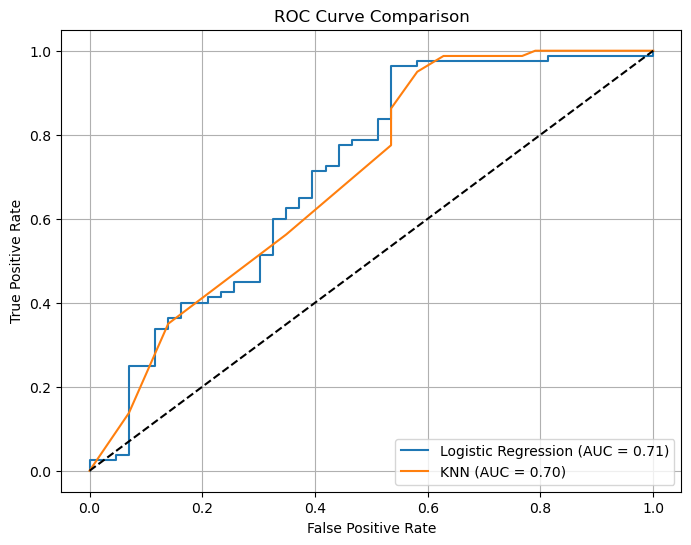

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_proba_logreg = model.predict_proba(X_test_scaled)[:, 1]
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Compute FPR, TPR, thresholds
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)

# Compute AUC scores
auc_logreg = roc_auc_score(y_test, y_proba_logreg)
auc_knn = roc_auc_score(y_test, y_proba_knn)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {auc_logreg:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [58]:
print(f"Logistic Regression AUC: {auc_logreg:.3f}")
print(f"KNN AUC: {auc_knn:.3f}")


Logistic Regression AUC: 0.707
KNN AUC: 0.699


# Random Forest


In [8]:
from sklearn.ensemble import RandomForestClassifier



In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred = rf_model.predict(X_test)


In [11]:
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy= {accuracy:.4f}\n")

accuracy= 0.7967



In [13]:
conf_matrix_rf=confusion_matrix(y_test,y_pred)
print("---CONFUSION MATRIX---")
print(conf_matrix_rf)
print("\n")


---CONFUSION MATRIX---
[[21 22]
 [ 3 77]]




In [14]:
print("-----CLASSIFICATION REPORT-----")
print(classification_report(y_test, y_pred))

-----CLASSIFICATION REPORT-----
              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.78      0.96      0.86        80

    accuracy                           0.80       123
   macro avg       0.83      0.73      0.74       123
weighted avg       0.81      0.80      0.78       123



In [15]:
print(y_train.value_counts())


Loan_Status
1    342
0    149
Name: count, dtype: int64


model is biased toward predicting loan approvals, missing many actual loan rejections (class 0).

In [19]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
y_pred = rf_model.predict(X_test)

In [21]:
print("-----CLASSIFICATION REPORT-----")
print(classification_report(y_test, y_pred))

-----CLASSIFICATION REPORT-----
              precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.77      0.96      0.86        80

    accuracy                           0.79       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.79      0.77       123



SMOTE (Synthetic Minority Oversampling Technique) will increase class 0 samples to match class 1, giving the model more balanced training.

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123



# XGBoost


In [25]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import xgboost as xgb
from xgboost import XGBClassifier

In [27]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    scale_pos_weight=342/149,   # Handle imbalance (ratio of majority/minority)
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:32:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



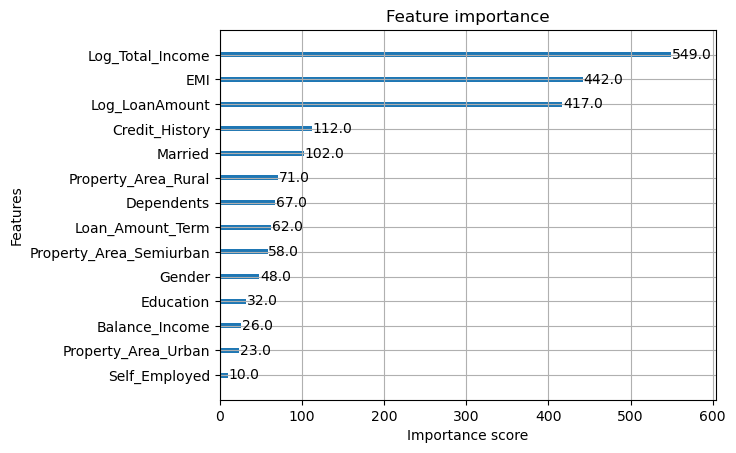

In [29]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train_smote, y_train_smote)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:34:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [31]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [32]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123



In [33]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=6,              # increase from 4
    learning_rate=0.03,
    random_state=42,
    use_label_encoder=False
)


In [34]:
model.fit(X_train_smote, y_train_smote)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



In [36]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 3.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# You can set the class_weights manually or based on ratio
class_weights = [2, 1]  # [weight for class 0, weight for class 1]

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.03,
    depth=5,
    class_weights=class_weights,
    eval_metric='Recall',  # optionally use 'Recall' to guide optimization
    random_seed=42,
    verbose=0
)

model.fit(X_train, y_train)


In [38]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22 21]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62        43
           1       0.78      0.93      0.85        80

    accuracy                           0.78       123
   macro avg       0.78      0.72      0.73       123
weighted avg       0.78      0.78      0.77       123



In [39]:
y_proba = model.predict_proba(X_test)[:, 1]

for thresh in [0.5, 0.4, 0.3, 0.2]:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh))


Threshold: 0.5
[[22 21]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62        43
           1       0.78      0.93      0.85        80

    accuracy                           0.78       123
   macro avg       0.78      0.72      0.73       123
weighted avg       0.78      0.78      0.77       123


Threshold: 0.4
[[20 23]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.62        43
           1       0.77      0.99      0.87        80

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.75       123
weighted avg       0.84      0.80      0.78       123


Threshold: 0.3
[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85

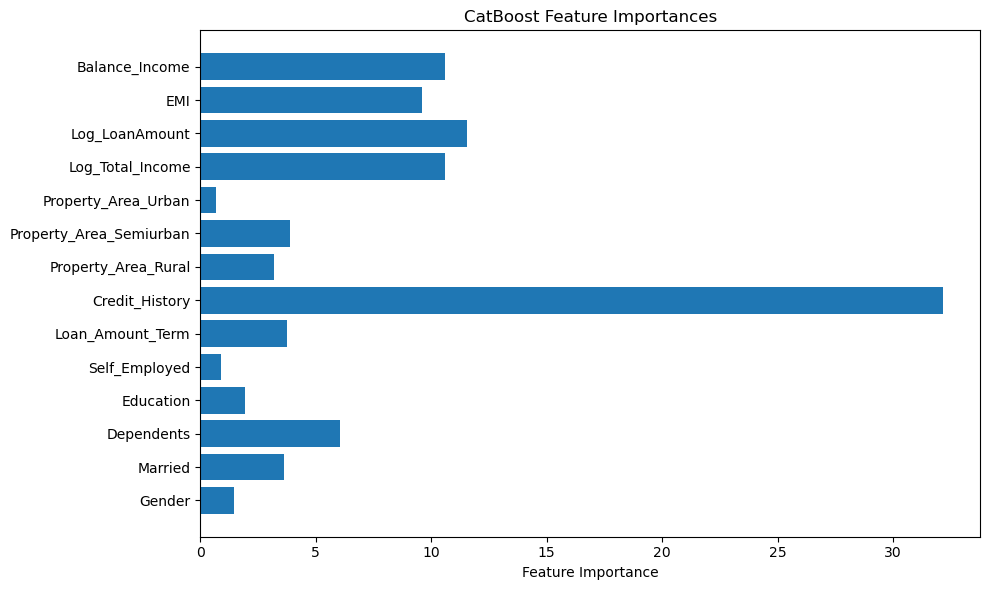

In [40]:
import matplotlib.pyplot as plt

feat_importance = model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feat_importance)
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importances")
plt.tight_layout()
plt.show()


In [41]:
for w in [2, 3, 4, 5]:
    print(f"\nTesting class_weights=[{w}, 1]")

    model = CatBoostClassifier(
        iterations=300,
        learning_rate=0.03,
        depth=5,
        class_weights=[w, 1],
        random_seed=42,
        verbose=0
    )

    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # You can keep using 0.4 threshold or loop through thresholds here
    y_pred = (y_proba >= 0.4).astype(int)

    print(classification_report(y_test, y_pred))



Testing class_weights=[2, 1]
              precision    recall  f1-score   support

           0       0.95      0.47      0.62        43
           1       0.77      0.99      0.87        80

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.75       123
weighted avg       0.84      0.80      0.78       123


Testing class_weights=[3, 1]
              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.78      0.96      0.86        80

    accuracy                           0.80       123
   macro avg       0.83      0.73      0.74       123
weighted avg       0.81      0.80      0.78       123


Testing class_weights=[4, 1]
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        43
           1       0.77      0.88      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.69     

In [42]:
from sklearn.metrics import f1_score

best_f1 = 0
best_thresh = 0.5

for thresh in [i/100 for i in range(20, 60)]:
    y_pred = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=0)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"\nBest F1 for class 0: {best_f1:.4f} at threshold = {best_thresh}")



Best F1 for class 0: 0.6154 at threshold = 0.36


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    class_weight={0: 3, 1: 1},  # weight toward class 0
    random_state=42
)

rf.fit(X_train, y_train)
rf_proba = rf.predict_proba(X_test)[:, 1]

# Use best threshold from above or repeat the search
rf_pred = (rf_proba >= best_thresh).astype(int)

print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.03,
    scale_pos_weight=43/80,  # class 0 / class 1
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_proba = xgb.predict_proba(X_test)[:, 1]
xgb_pred = (xgb_proba >= best_thresh).astype(int)

print(classification_report(y_test, xgb_pred))


              precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.77      0.96      0.86        80

    accuracy                           0.79       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.79      0.77       123



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [45]:
avg_proba = (y_proba + rf_proba + xgb_proba) / 3
ensemble_pred = (avg_proba >= best_thresh).astype(int)

print("Ensemble Performance:")
print(classification_report(y_test, ensemble_pred))

Ensemble Performance:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



In [46]:
# Feature 1: Credit risk adjusted by loan amount
df['Credit_Loan_Ratio'] = df['Credit_History'] * df['Log_LoanAmount']

# Feature 2: Socioeconomic stability
df['Married_Educated'] = df['Married'] * df['Education']

# Feature 3: Family burden indicator
df['SelfEmp_Dependents'] = df['Self_Employed'] * df['Dependents']

# Feature 4: Burden of EMI relative to income
df['Term_Income_Ratio'] = df['Loan_Amount_Term'] / df['Log_Total_Income']

# Feature 5: Bucket loan size
df['LoanAmount_Bin'] = pd.cut(df['Log_LoanAmount'], bins=[0, 3, 3.5, 5], labels=[0, 1, 2])
df['LoanAmount_Bin'] = df['LoanAmount_Bin'].astype(int)


ValueError: Cannot convert float NaN to integer